## Client: No-Churn Telecom | Category: Telecom – Churn Rate ML

## ----------------------------Project Ref: PM-PR-0017----------------------------

## Business Case:

No-Churn Telecom is an established Telecom operator in Europe
with more than a decade in Business. Due to new players in the
market, telecom industry has become very competitive and
retaining customers becoming a challenge.
In spite of No-Churn initiatives of reducing tariffs and promoting
more offers, the churn rate ( percentage of customers migrating to
competitors) is well above 10%.
No-Churn wants to explore possibility of Machine Learning to help
with following use cases to retain competitive edge in the industry.

## PROJECT GOAL
Help No-Churn with their use cases with ML
1. Understanding the variables that are influencing the customers
to migrate.
2. Creating Churn risk scores that can be indicative to drive
retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with values
YES(1) or NO(0) so that email campaigns with lucrative offers
can be targeted to Churn YES customers.

## Importing Basics Libararies

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [409]:
data=pd.read_csv("Telecom_churn.csv")

In [410]:
data_original = data.copy()

## We keep identifiers like Phone for final reporting only.

In [411]:
data.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [412]:
data.shape

(4617, 21)

In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-null   object 
 5   VMail Plan            4617 non-null   object 
 6   VMail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night Charge         

In [414]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [415]:
data.isnull().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [416]:
data.describe(include="O")

,State,Phone,International Plan,VMail Plan,Churn
count,4617,4617,4617,4617,4617
unique,51,4617,2,2,2
top,WV,382-4657,no,no,False.
freq,149,1,4171,3381,3961


In [417]:
data.value_counts('Churn')

Churn
False.    3961
True.      656
Name: count, dtype: int64

In [418]:
data['Churn'].value_counts(normalize=True) * 100




Churn
False.    85.79164
True.     14.20836
Name: proportion, dtype: float64

## EDA

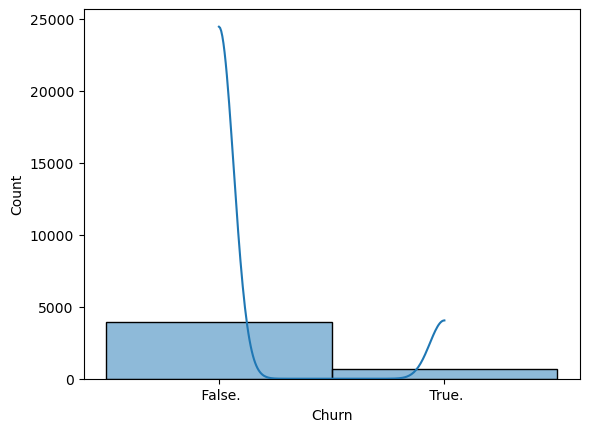

In [419]:
sns.histplot(x="Churn",data=data,kde=True)
plt.show()

In [420]:
pd.crosstab(data["State"], data["Churn"])


Churn,False.,True.
State,,
AK,64,5
AL,104,10
AR,62,15
AZ,74,7
CA,31,13
CO,81,10
CT,78,14
DC,73,9
DE,75,14


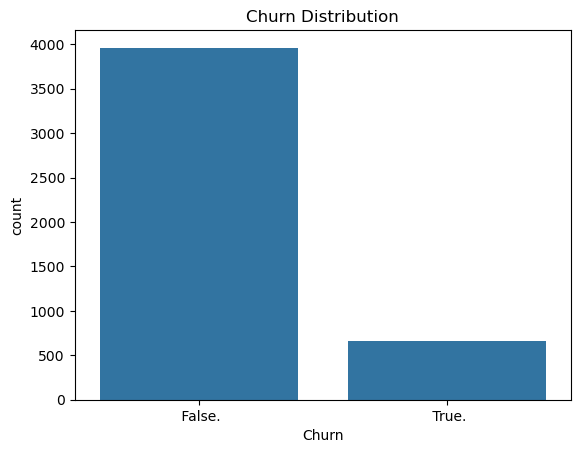

In [421]:
sns.countplot(x="Churn",data=data)
plt.title("Churn Distribution")
plt.show()

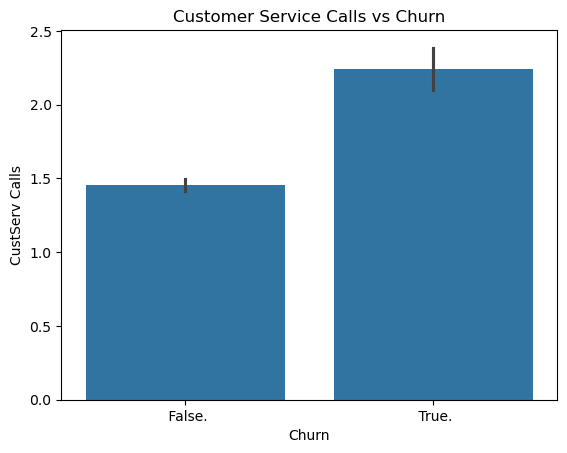

In [422]:
sns.barplot(x='Churn', y='CustServ Calls',data=data)
plt.title("Customer Service Calls vs Churn")
plt.show()

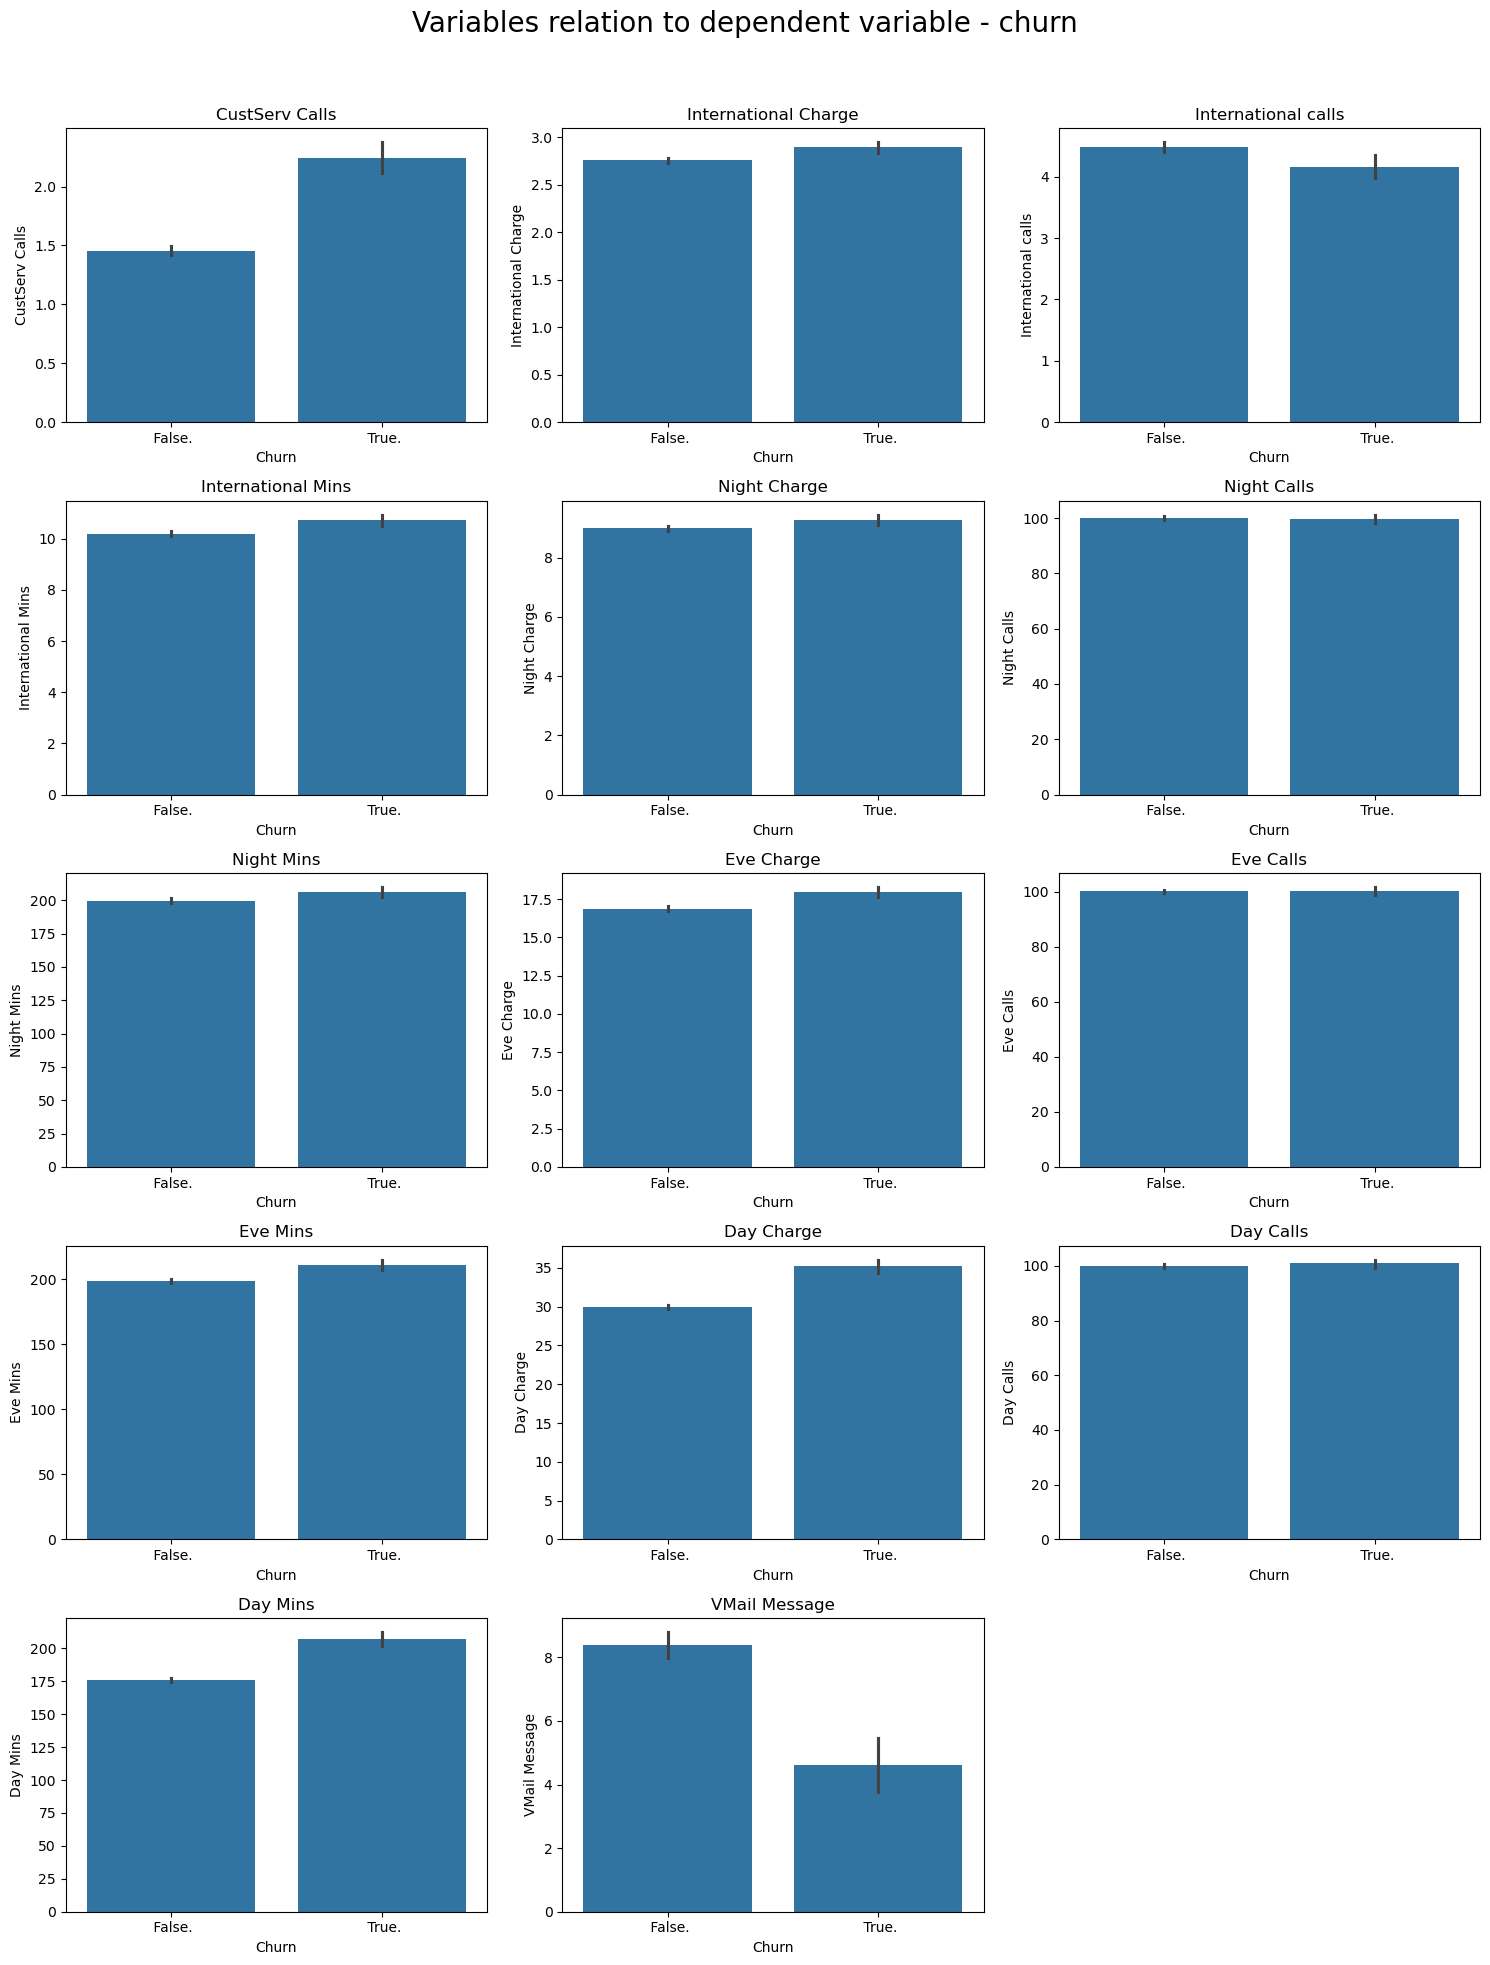

In [423]:
features = [
    'CustServ Calls',
    'International Charge',
    'International calls',
    'International Mins',
    'Night Charge',
    'Night Calls',
    'Night Mins',
    'Eve Charge',
    'Eve Calls',
    'Eve Mins',
    'Day Charge',
    'Day Calls',
    'Day Mins',
    'VMail Message'
]

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(5, 3, i)
    sns.barplot(x='Churn', y=feature, data=data)
    plt.title(feature)

plt.suptitle("Variables relation to dependent variable - churn", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## key insights:

Churned customers make more customer service calls → strong sign of dissatisfaction

Churn is higher among high-usage, high-charge customers (day, evening, night, international)

Call counts (day/eve/night) show little difference → weak predictors

International charges/minutes matter more than international call frequency

Voicemail usage is lower for churned customers → engagement reduces churn

## Feature Engineering

In [424]:
data=pd.get_dummies(data,columns=["State"],drop_first=True)

In [425]:
from sklearn.preprocessing import LabelEncoder

data['Churn'] = (
    data['Churn']
    .astype(str)
    .str.strip()
    .str.replace('.', '', regex=False)
)

data['Churn'] = LabelEncoder().fit_transform(data['Churn'])



In [426]:
for col in ['International Plan', 'VMail Plan']:
    data[col] = (
        data[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .str.replace('.', '', regex=False)
        .map({'no': 0, 'yes': 1})
    )



In [427]:
data_original = data.copy()


In [428]:
#Phone number is just an ID, not useful for prediction.
data.drop(columns=['Phone'], inplace=True)

#Charges are directly calculated from minutes → duplicate info.
charge_cols = [ 'Day Charge', 'Eve Charge', 'Night Charge', 'International Charge' ] 
data.drop(columns=charge_cols, inplace=True)
data

,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,197.4,99,244.7,...,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,195.5,103,254.4,...,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,121.2,110,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,61.9,88,196.9,...,False,False,False,False,False,False,False,False,False,False
4,75,415,1,0,0,166.7,113,148.3,122,186.9,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,57,510,0,1,25,144.0,81,187.2,112,158.6,...,False,False,False,False,False,False,False,False,False,False
4613,177,408,0,1,29,189.0,91,303.1,96,163.6,...,False,False,False,False,False,False,False,False,False,False
4614,67,408,0,1,33,127.5,126,296.1,129,200.9,...,False,False,False,False,False,True,False,False,False,False
4615,98,415,0,1,23,168.9,98,226.3,117,165.5,...,False,False,False,False,False,False,False,False,False,False


In [429]:
data.columns

Index(['Account Length', 'Area Code', 'International Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls',
       'Night Mins', 'Night Calls', 'International Mins',
       'International calls', 'CustServ Calls', 'Churn', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC',
       'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA',
       'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS',
       'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ',
       'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR',
       'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX',
       'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV',
       'State_WY'],
      dtype='object')

In [430]:
x = data.drop(columns=['Churn'])
y = data['Churn']


In [431]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [432]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.transform(x_test)

In [433]:
from imblearn .over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_smote,y_train_smote=sm.fit_resample(scaled_x_train,y_train)

## LogisticRegression

In [434]:
from sklearn.linear_model import LogisticRegression

In [435]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train_smote,y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [436]:
y_predict=model.predict(scaled_x_test)

In [437]:
y_proba=model.predict_proba(scaled_x_test)[:,1]

In [438]:
from sklearn.metrics import classification_report, roc_auc_score,confusion_matrix

print(classification_report(y_test, y_predict))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.94      0.77      0.84       793
           1       0.33      0.69      0.45       131

    accuracy                           0.76       924
   macro avg       0.63      0.73      0.65       924
weighted avg       0.85      0.76      0.79       924

ROC-AUC: 0.7842861680929507


##  RandomForestClassifier

In [439]:
from sklearn.ensemble import RandomForestClassifier

In [440]:
rf=RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(x_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [441]:

# Predictions
y_predict_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)[:, 1]

# Metrics
print(classification_report(y_test, y_predict_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       793
           1       0.91      0.59      0.71       131

    accuracy                           0.93       924
   macro avg       0.92      0.79      0.84       924
weighted avg       0.93      0.93      0.93       924

ROC-AUC: 0.8945785162153577


## GridSearchCV (systematic tuning)

In [442]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2']
}


In [ ]:
grid = GridSearchCV(
    RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    ),
    param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid.fit(x_train, y_train)

best_rf = grid.best_estimator_
print(grid.best_params_)


In [ ]:
y_pred = best_rf.predict(x_test)
y_prob = best_rf.predict_proba(x_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


In [ ]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"])
confusion_matrix

In [ ]:
#Feature Importance (Churn Drivers)
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)


In [ ]:
##Predict Churn Probability for ALL Customers


churn_prob = rf.predict_proba(x)[:, 1]
churn_flag = (churn_prob >= 0.5).astype(int)


In [ ]:
## Add Predictions to Original Dataset
data_original['Churn_Probability'] = churn_prob
data_original['CHURN_FLAG'] = churn_flag
data_original['Churn_Risk_Score'] = (churn_prob * 100).round(2)


In [ ]:
##Create Churn Risk Levels
data_original['Churn_Risk_Level'] = pd.cut(
    data_original['Churn_Probability'],
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Low', 'Medium', 'High']
)


In [ ]:
##Create Customer Reference ID
data_original['Customer_Ref_ID'] = range(1, len(data_original) + 1)


In [ ]:
##FINAL BUSINESS OUTPUT
final_churn_report = data_original[
    ['Customer_Ref_ID',
     'Phone',
     'Account Length',
     'Area Code',
     'Churn_Probability',
     'Churn_Risk_Score',
     'Churn_Risk_Level',
     'CHURN_FLAG']
]

final_churn_report.head(20)


In [ ]:
##High-Risk Customers (Action List)

final_churn_report[
    final_churn_report['Churn_Risk_Level'] == 'High'
].sort_values(by='Churn_Probability', ascending=False).head(20)

## Export Final Report
final_churn_report.to_csv("Final_Churn_Risk_Report.csv", index=False)
